<a href="https://colab.research.google.com/github/maadmaaax/Project_NBA_GroupM/blob/main/Analyse_Graphique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4 pandas #requestsfetches the page,beautifulsoup4finds the data on the page, andpandas` organizes it into a table.

In [5]:
#Run the file that possess data loading and cleaning to access relevant data set
!git clone https://github.com/maadmaaax/Project_NBA_GroupM
!jupyter nbconvert --to python Project_NBA_GroupM/Analyse_Principale.ipynb
%run Project_NBA_GroupM/Analyse_Principale.py
!pip install svgpath2mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image, display
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import io
import os
import xml.etree.ElementTree as ET
from svgpath2mpl import parse_path
import matplotlib.patches as patches

fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.
[NbConvertApp] Converting notebook Project_NBA_GroupM/Analyse_Principale.ipynb to python
[NbConvertApp] Writing 17450 bytes to Project_NBA_GroupM/Analyse_Principale.py
fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.

 Winners based on our model vs actual winners:
    Season Team  Final_Power_Score  Actual Rank Team  Win% of actual winner
0     2005  SAC           0.790386            8  PHO               0.756098
1     2006  PHO           0.881307            4  DET               0.780488
2     2007  DET           0.772769            4  DAL               0.817073
3     2008  LAL           0.806611            3  BOS               0.804878
4     2009  DET           0.823724           17  CLE               0.804878
5     2010  SAS           0.780098           12  CLE               0.743902
6     2011  HOU           0.796630           14  CHI               0.7

FileNotFoundError: [Errno 2] No such file or directory: 'roster_2026.csv'

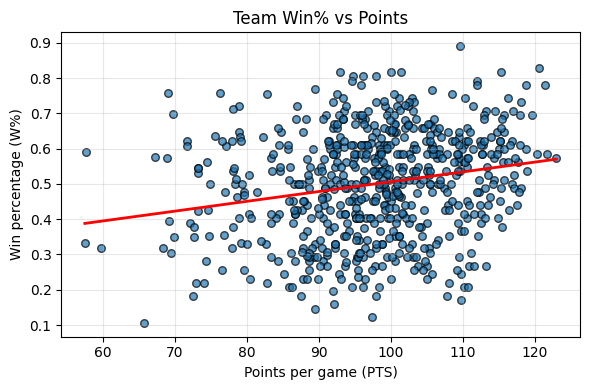

In [ ]:

 #Plot team win% vs Point per games
norm=nbas_data_full
norm['PTS']=(norm['PTS']*norm['G'])/82
#Most player played less than 82 game so the mean ppg of player isn't equal to mean ppg of team that why we normalize by 82(total game of a team) to have actual team data
plotdf=norm.groupby(['Season','Team'])[all_stats].sum().reset_index()
plotdf= pd.merge(plotdf,sts_data_full,on=['Team','Season'])
plotdf = plotdf.drop(columns=['Rk'])

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(plotdf['PTS'], plotdf['W%'],
           alpha=0.7,
           s=30,
           color='tab:blue',
           edgecolor='k')

ax.set_xlabel('Points per game (PTS)')
ax.set_ylabel('Win percentage (W%)')
ax.set_title('Team Win% vs Points')
ax.grid(True, alpha=0.3)


x = plotdf['PTS'].values
y = plotdf['W%'].values

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Sort x for a nice line
x_line = np.linspace(x.min(), x.max(), 100)
ax.plot(x_line, p(x_line), color='red', linewidth=2, label='Trend line')



plt.tight_layout()
plt.show()


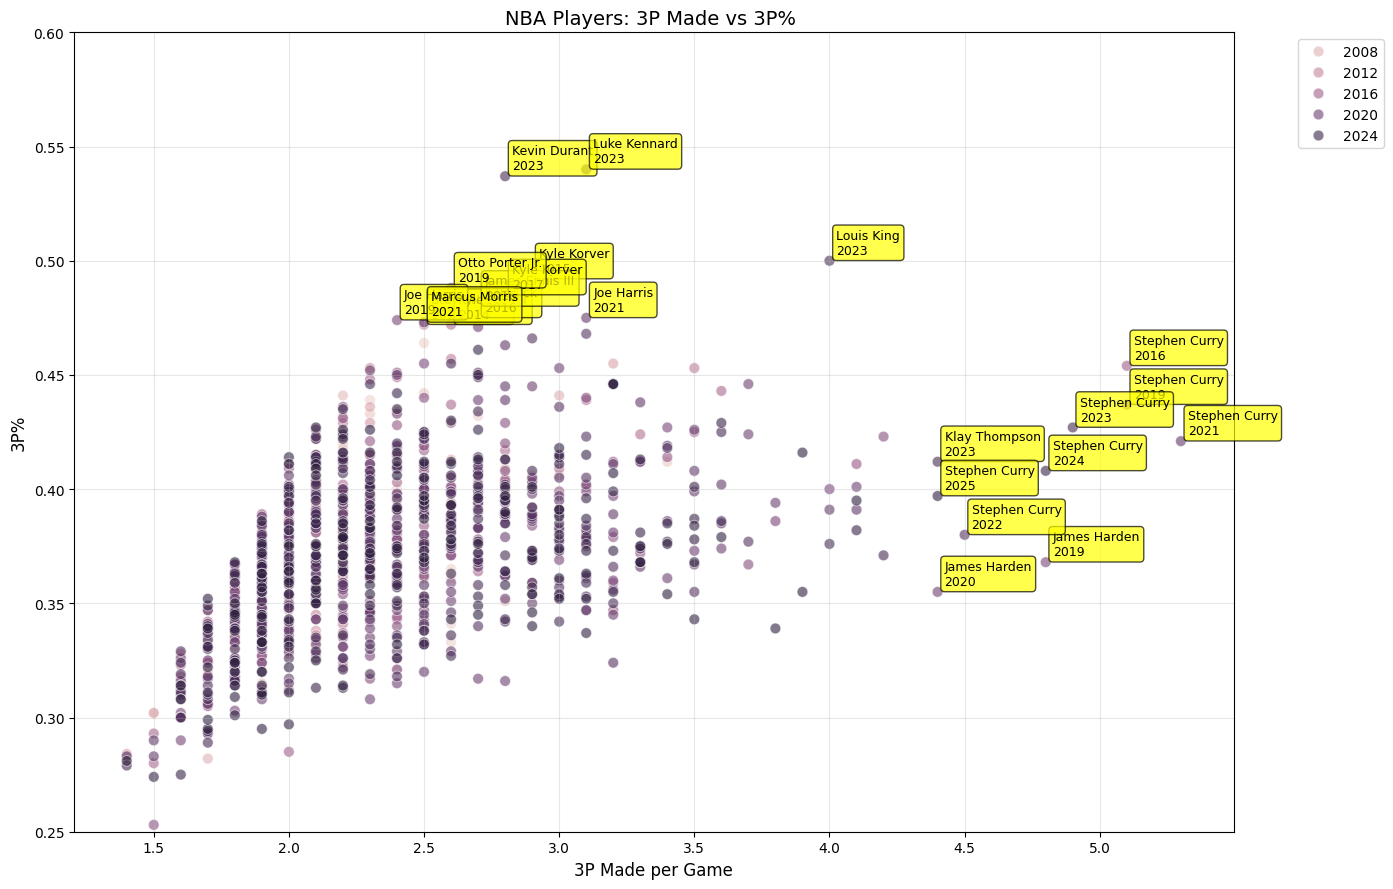

We can see that there's 2 type of outlier, the first category we will call selective
shooter with high efficiency 47-54% but relatively low 3P made less than 3.5 some notable player are Kevin Durant, Luke Kennard or Kyle Korver.
The second category are the volume shooter they still have above average accuracy
35-46% but high number of 3 point made more than 3.9 and up to 5.5 3PM, the face of this category is Stephen Curry


In [16]:
#3P made vs 3P% by player
df = nbas_data_full
# Select relevant columns and drop rows with missing 3P/3P%
relevant = df[['3P', '3P%', '3PA', 'Player', 'Season', 'Team']].dropna(subset=['3P', '3P%', '3PA'])
#Keeping only player who attempted more than 5 3P to filter noise created by player who doesn't shoot often
relevant = relevant[relevant['3PA'] >= 5.0]

# Filter to 25%-60% 3P% range
filtered = relevant[(relevant['3P%'] >= 0.25) & (relevant['3P%'] <= 0.60)].copy()

# Define outliers: top 10 by 3P made OR extreme 3P% within range
outliers = pd.concat([
    filtered.nlargest(10, '3P'),  # Top volume shooters
    filtered[filtered['3P%'] >= filtered['3P%'].quantile(0.99)],  # Top 1% shooters
]).drop_duplicates()

# Create the scatter plot
plt.figure(figsize=(14, 9))
scatter = sns.scatterplot(data=filtered, x='3P', y='3P%', hue='Season', alpha=0.6, s=60)

# Add outlier labels
for idx, row in outliers.iterrows():
    plt.annotate(f"{row['Player']}\n{int(row['Season'])}",
                xy=(row['3P'], row['3P%']),
                xytext=(5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=9, ha='left')

plt.xlabel('3P Made per Game', fontsize=12)
plt.ylabel('3P%', fontsize=12)
plt.title('NBA Players: 3P Made vs 3P% ', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0.25, 0.60)  # Lock y-axis to requested range

plt.tight_layout()
plt.show()



print("We can see that there's 2 type of outlier, the first category we will call selective")
print("shooter with high efficiency 47-54% but relatively low 3P made less than 3.5 some notable player are Kevin Durant, Luke Kennard or Kyle Korver.")
print("The second category are the volume shooter they still have above average accuracy")
print( "35-46% but high number of 3 point made more than 3.9 and up to 5.5 3PM, the face of this category is Stephen Curry")

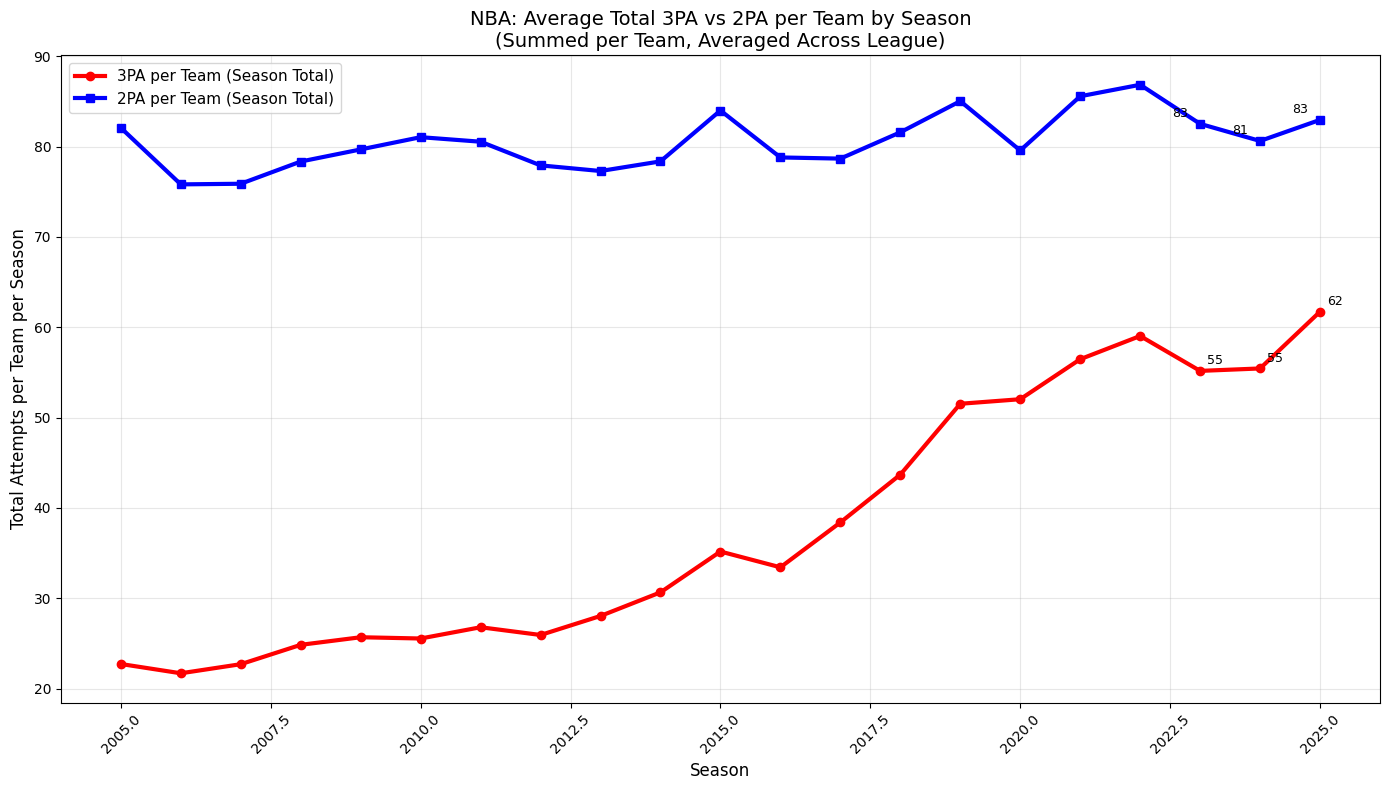

Average Total Attempts per Team by Season:
    Season  3PA  2PA
0     2005   23   82
1     2006   22   76
2     2007   23   76
3     2008   25   78
4     2009   26   80
5     2010   26   81
6     2011   27   81
7     2012   26   78
8     2013   28   77
9     2014   31   78
10    2015   35   84
11    2016   33   79
12    2017   38   79
13    2018   44   82
14    2019   52   85
15    2020   52   80
16    2021   56   86
17    2022   59   87
18    2023   55   83
19    2024   55   81
20    2025   62   83

3PA Growth: 62 in 2025 (+172% from 2005)

2PA Growth: 83 in 2025 (-1% from 2005)
Teams per season avg: 30.0


In [31]:
#Evolution of shot attempt by team
# Group by Season and Team, sum attempts per team, then average across teams per season
team_attempts = df.groupby(['Season', 'Team'])[['3PA', '2PA']].sum().reset_index()
season_team_avg = team_attempts.groupby('Season')[['3PA', '2PA']].mean().reset_index()
season_team_avg['Season'] = pd.to_numeric(season_team_avg['Season'], errors='coerce')



# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_team_avg['Season'], season_team_avg['3PA'],
         marker='o', linewidth=3, label='3PA per Team (Season Total)', color='red')
plt.plot(season_team_avg['Season'], season_team_avg['2PA'],
         marker='s', linewidth=3, label='2PA per Team (Season Total)', color='blue')

# Customize the plot
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Attempts per Team per Season', fontsize=12)
plt.title('NBA: Average Total 3PA vs 2PA per Team by Season\n(Summed per Team, Averaged Across League)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels on recent seasons
for i in range(-3, 0):
    plt.annotate(f'{season_team_avg["3PA"].iloc[i]:.0f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['3PA'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_team_avg["2PA"].iloc[i]:.0f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['2PA'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary stats
print("Average Total Attempts per Team by Season:")
print(season_team_avg[['Season', '3PA', '2PA']].round(0).astype(int))
print(f"\n3PA Growth: {season_team_avg['3PA'].iloc[-1]:.0f} in {season_team_avg['Season'].iloc[-1]} "
      f"(+{((season_team_avg['3PA'].iloc[-1]/season_team_avg['3PA'].iloc[0]-1)*100):.0f}% from {season_team_avg['Season'].iloc[0]})")
print(f"\n2PA Growth: {season_team_avg['2PA'].iloc[-1]:.0f} in {season_team_avg['Season'].iloc[-1]} "
      f"({((season_team_avg['2PA'].iloc[0]/season_team_avg['2PA'].iloc[-1]-1)*100):.0f}% from {season_team_avg['Season'].iloc[0]})")
print(f"Teams per season avg: {team_attempts.groupby('Season')['Team'].nunique().mean():.1f}")

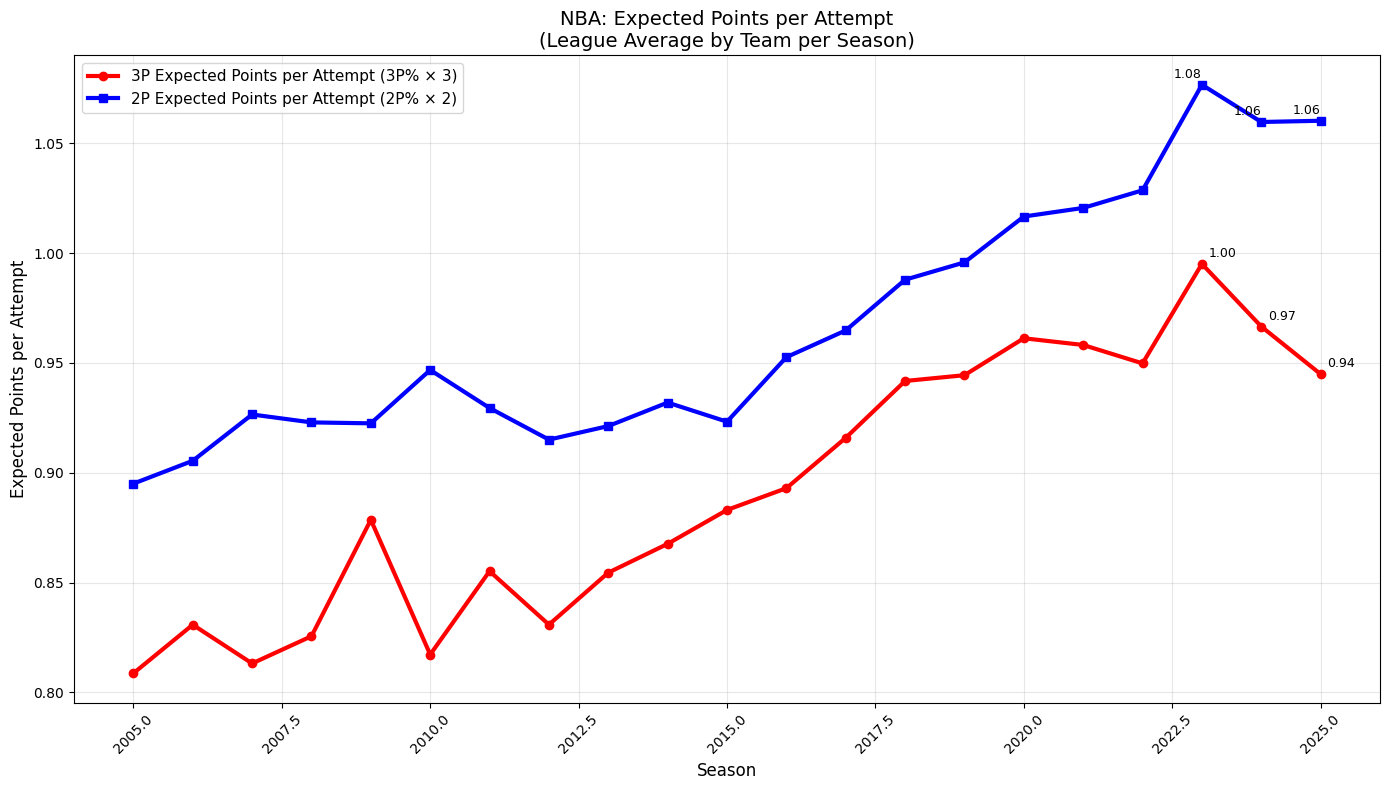

Expected Points per Attempt by Season (Avg across teams):
    Season  2P_exp_per_attempt  3P_exp_per_attempt
0     2005               0.895               0.809
1     2006               0.905               0.831
2     2007               0.927               0.813
3     2008               0.923               0.826
4     2009               0.922               0.879
5     2010               0.947               0.817
6     2011               0.929               0.855
7     2012               0.915               0.831
8     2013               0.921               0.855
9     2014               0.932               0.868
10    2015               0.923               0.883
11    2016               0.953               0.893
12    2017               0.965               0.916
13    2018               0.988               0.942
14    2019               0.996               0.944
15    2020               1.017               0.961
16    2021               1.021               0.958
17    2022              

In [26]:
#Expected point over the season by team
# Group by Season and Team, calculate expected points per attempt, then average across teams per season
team_stats = df.groupby(['Season', 'Team']).agg({
    '2P%': 'mean',
    '3P%': 'mean'
}).reset_index()

# Calculate expected points PER ATTEMPT for each shot type per team
team_stats['2P_exp_per_attempt'] = team_stats['2P%'] * 2
team_stats['3P_exp_per_attempt'] = team_stats['3P%'] * 3

# Average across teams per season
season_team_avg = team_stats.groupby('Season')[['2P_exp_per_attempt', '3P_exp_per_attempt']].mean().reset_index()
season_team_avg['Season'] = pd.to_numeric(season_team_avg['Season'], errors='coerce')
season_team_avg = season_team_avg[season_team_avg['3P_exp_per_attempt'] > 0].sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_team_avg['Season'], season_team_avg['3P_exp_per_attempt'],
         marker='o', linewidth=3, label='3P Expected Points per Attempt (3P% × 3)', color='red')
plt.plot(season_team_avg['Season'], season_team_avg['2P_exp_per_attempt'],
         marker='s', linewidth=3, label='2P Expected Points per Attempt (2P% × 2)', color='blue')

# Customize the plot
plt.xlabel('Season', fontsize=12)
plt.ylabel('Expected Points per Attempt', fontsize=12)
plt.title('NBA: Expected Points per Attempt\n(League Average by Team per Season)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels on recent seasons
for i in range(-3, 0):
    plt.annotate(f'{season_team_avg["3P_exp_per_attempt"].iloc[i]:.2f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['3P_exp_per_attempt'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_team_avg["2P_exp_per_attempt"].iloc[i]:.2f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['2P_exp_per_attempt'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary stats
print("Expected Points per Attempt by Season (Avg across teams):")
print(season_team_avg[['Season', '2P_exp_per_attempt', '3P_exp_per_attempt']].round(3))
print(f"\nRecent season ({season_team_avg['Season'].iloc[-1]}):")
print(f"2P: {season_team_avg['2P_exp_per_attempt'].iloc[-1]:.3f} pts/attempt")
print(f"3P: {season_team_avg['3P_exp_per_attempt'].iloc[-1]:.3f} pts/attempt")
print(f"3P efficiency: {season_team_avg['3P_exp_per_attempt'].iloc[-1]/season_team_avg['2P_exp_per_attempt'].iloc[-1]:.2f}x 2P efficiency")

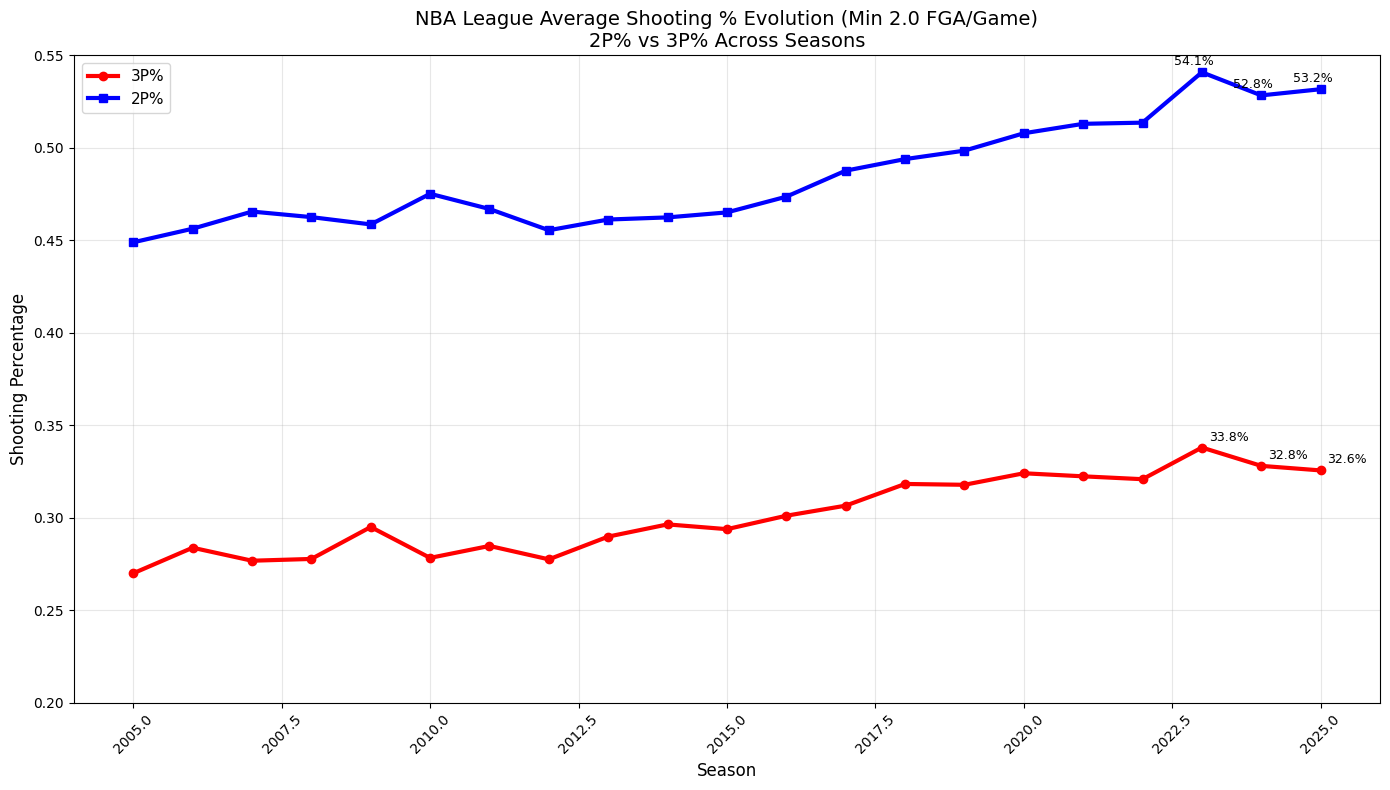

League Average Shooting % by Season (Min 2 FGA):
    Season    2P%    3P%
0     2005  0.449  0.270
1     2006  0.456  0.284
2     2007  0.466  0.277
3     2008  0.463  0.278
4     2009  0.459  0.295
5     2010  0.475  0.278
6     2011  0.467  0.285
7     2012  0.455  0.277
8     2013  0.461  0.290
9     2014  0.462  0.296
10    2015  0.465  0.294
11    2016  0.474  0.301
12    2017  0.488  0.307
13    2018  0.494  0.318
14    2019  0.498  0.318
15    2020  0.508  0.324
16    2021  0.513  0.322
17    2022  0.514  0.321
18    2023  0.541  0.338
19    2024  0.528  0.328
20    2025  0.532  0.326

Players qualified (≥2 FGA): 10,551 player-seasons
Seasons covered: 21 (2005-2025)

Recent season (2025):
2P%: 53.2%
3P%: 32.6%
3P% of 2P%: 61%
3P% improvement since 2005: +5.6 percentage points
2P% improvement since 2005: +8.3 percentage points


In [25]:
#Evolution of accuracy 2P% and 3P% by teaam
df_filtered = df[df['FGA'] >= 2.0].copy()

# Group by Season, calculate league average shooting percentages across qualified players
season_shooting = df_filtered.groupby('Season')[['2P%', '3P%']].mean().reset_index()
season_shooting['Season'] = pd.to_numeric(season_shooting['Season'], errors='coerce')
season_shooting = season_shooting.dropna().sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_shooting['Season'], season_shooting['3P%'],
         marker='o', linewidth=3, label='3P%', color='red')
plt.plot(season_shooting['Season'], season_shooting['2P%'],
         marker='s', linewidth=3, label='2P%', color='blue')

# Customize the plot
plt.xlabel('Season', fontsize=12)
plt.ylabel('Shooting Percentage', fontsize=12)
plt.title('NBA League Average Shooting % Evolution (Min 2.0 FGA/Game)\n2P% vs 3P% Across Seasons', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.ylim(0.20, 0.55)  # Focus on relevant range

# Add value labels on recent seasons
for i in range(-3, 0):
    plt.annotate(f'{season_shooting["3P%"].iloc[i]:.1%}',
                xy=(season_shooting['Season'].iloc[i], season_shooting['3P%'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_shooting["2P%"].iloc[i]:.1%}',
                xy=(season_shooting['Season'].iloc[i], season_shooting['2P%'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary stats
print("League Average Shooting % by Season (Min 2 FGA):")
print(season_shooting.round(3))
print(f"\nPlayers qualified (≥2 FGA): {len(df_filtered):,} player-seasons")
print(f"Seasons covered: {len(season_shooting)} ({season_shooting['Season'].min()}-{season_shooting['Season'].max():.0f})")
print(f"\nRecent season ({season_shooting['Season'].iloc[-1]:.0f}):")
print(f"2P%: {season_shooting['2P%'].iloc[-1]:.1%}")
print(f"3P%: {season_shooting['3P%'].iloc[-1]:.1%}")
print(f"3P% of 2P%: {(season_shooting['3P%'].iloc[-1]/season_shooting['2P%'].iloc[-1]*100):.0f}%")
print(f"3P% improvement since {season_shooting['Season'].iloc[0]:.0f}: +{(season_shooting['3P%'].iloc[-1]-season_shooting['3P%'].iloc[0])*100:.1f} percentage points")
print(f"2P% improvement since {season_shooting['Season'].iloc[0]:.0f}: +{(season_shooting['2P%'].iloc[-1]-season_shooting['2P%'].iloc[0])*100:.1f} percentage points")

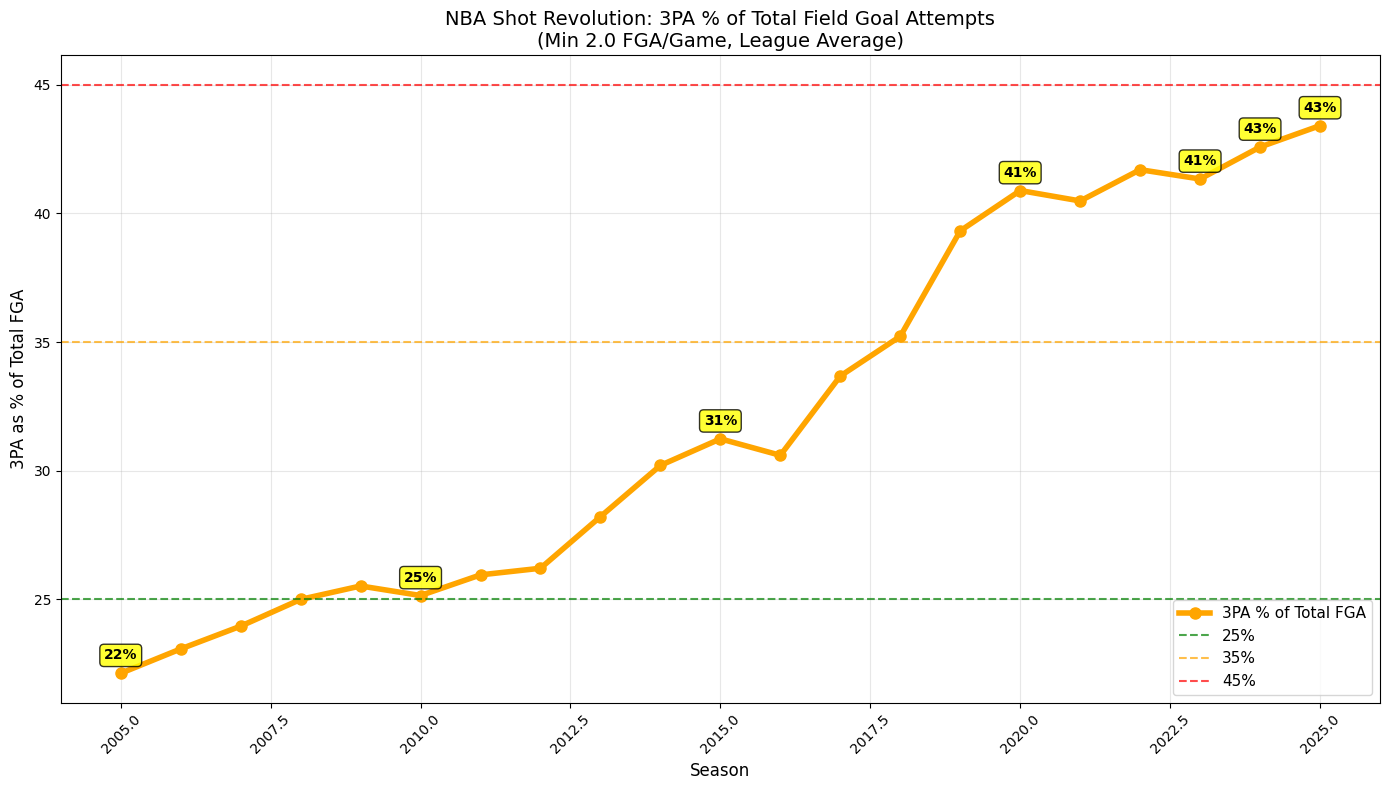

3PA/FGA Ratio Evolution (Min 2 FGA):
    Season  3PA_ratio
0     2005      0.221
1     2006      0.231
2     2007      0.240
3     2008      0.250
4     2009      0.255
5     2010      0.251
6     2011      0.259
7     2012      0.262
8     2013      0.282
9     2014      0.302
10    2015      0.312
11    2016      0.306
12    2017      0.337
13    2018      0.352
14    2019      0.393
15    2020      0.409
16    2021      0.405
17    2022      0.417
18    2023      0.413
19    2024      0.426
20    2025      0.434

Key Milestones:
2005: 22%
2010: 25%
2015: 31%
2025: 43%
Total increase: +96%
Qualified players: 10,551 player-seasons


In [32]:

# Filter out players with less than 2 FGA per game
df_filtered = df[df['FGA'] >= 2.0].copy()

# Calculate 3PA as % of total FGA for each player
df_filtered['3PA_ratio'] = df_filtered['3PA'] / df_filtered['FGA']

# Group by season and calculate league average 3PA ratio
season_ratio = df_filtered.groupby('Season')['3PA_ratio'].mean().reset_index()
season_ratio['Season'] = pd.to_numeric(season_ratio['Season'], errors='coerce')
season_ratio = season_ratio.dropna().sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_ratio['Season'], season_ratio['3PA_ratio'] * 100,
         marker='o', linewidth=4, label='3PA % of Total FGA', color='orange', markersize=8)

# Add 25%, 35%, 45% reference lines
plt.axhline(y=25, color='green', linestyle='--', alpha=0.7, label='25%')
plt.axhline(y=35, color='orange', linestyle='--', alpha=0.7, label='35%')
plt.axhline(y=45, color='red', linestyle='--', alpha=0.7, label='45%')

# Customize the plot
plt.xlabel('Season', fontsize=12)
plt.ylabel('3PA as % of Total FGA', fontsize=12)
plt.title('NBA Shot Revolution: 3PA % of Total Field Goal Attempts\n(Min 2.0 FGA/Game, League Average)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels every 3 years + recent seasons
label_years = [2005, 2010, 2015, 2020, 2023, 2024, 2025]
for year in label_years:
    if year in season_ratio['Season'].values:
        idx = season_ratio[season_ratio['Season'] == year].index[0]
        plt.annotate(f'{season_ratio.loc[idx, "3PA_ratio"]*100:.0f}%',
                    xy=(year, season_ratio.loc[idx, '3PA_ratio']*100),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center', fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

# Print key milestones
print("3PA/FGA Ratio Evolution (Min 2 FGA):")
print(season_ratio.round(3))
print(f"\nKey Milestones:")
print(f"2005: {season_ratio[season_ratio['Season']==2005]['3PA_ratio'].iloc[0]*100:.0f}%")
print(f"2010: {season_ratio[season_ratio['Season']==2010]['3PA_ratio'].iloc[0]*100:.0f}%")
print(f"2015: {season_ratio[season_ratio['Season']==2015]['3PA_ratio'].iloc[0]*100:.0f}%")
print(f"2025: {season_ratio['3PA_ratio'].iloc[-1]*100:.0f}%")
print(f"Total increase: +{((season_ratio['3PA_ratio'].iloc[-1]/season_ratio['3PA_ratio'].iloc[0]-1)*100):.0f}%")
print(f"Qualified players: {len(df_filtered):,} player-seasons")
